# SUPER 핵심역량 데이터 심층 분석

**분석 목표:** '학년도', '단과대학', '학년' 변수를 조합하여 가능한 모든 경우의 수에 대한 집단별 역량 차이를 상세하게 분석하고 시각화한다.

## 1. 분석 환경 준비 및 데이터 전처리

분석에 필요한 라이브러리를 불러오고, 한글 폰트를 설정합니다. 이전과 동일하게 5대 핵심역량(S, U, P, E, R)의 평균 점수를 계산하여 파생 변수로 추가합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 1. Matplotlib 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: # Linux
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
file_path = 'SUPER 핵심역량 진단평가.xlsx'
df = pd.read_excel(file_path, sheet_name='only_data')

# 3. 5대 역량 평균 컬럼 추가
df['S'] = df[['S1', 'S2', 'S3']].mean(axis=1)
df['U'] = df[['U1', 'U2', 'U3']].mean(axis=1)
df['P'] = df[['P1', 'P2', 'P3']].mean(axis=1)
df['E'] = df[['E1', 'E2', 'E3']].mean(axis=1)
df['R'] = df[['R1', 'R2', 'R3']].mean(axis=1)

print("데이터 준비 완료")

데이터 준비 완료


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38431 entries, 0 to 38430
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학년도     38431 non-null  int64  
 1   학기      38431 non-null  int64  
 2   학번      38431 non-null  int64  
 3   대학      38431 non-null  object 
 4   학년      38431 non-null  int64  
 5   S1      38431 non-null  float64
 6   S2      38431 non-null  float64
 7   S3      38431 non-null  float64
 8   U1      38431 non-null  float64
 9   U2      38431 non-null  float64
 10  U3      38431 non-null  float64
 11  P1      38431 non-null  float64
 12  P2      38431 non-null  float64
 13  P3      38431 non-null  float64
 14  E1      38431 non-null  float64
 15  E2      38431 non-null  float64
 16  E3      38431 non-null  float64
 17  R1      38431 non-null  float64
 18  R2      38431 non-null  float64
 19  R3      38431 non-null  float64
 20  S       38431 non-null  float64
 21  U       38431 non-null  float64
 22

## 2. 단일 집단별 분석 (1-Way Analysis)

각 변수('학년도', '학년', '대학')를 개별적으로 사용하여 집단 간 역량 평균을 비교합니다. 이는 각 변수가 역량 점수에 미치는 전반적인 영향을 파악하는 데 목적이 있습니다.

### 2-1. 학년도별 역량 평균 비교
**분석 목적:** 연도별 학생들의 역량 수준 변화 추세를 확인합니다.

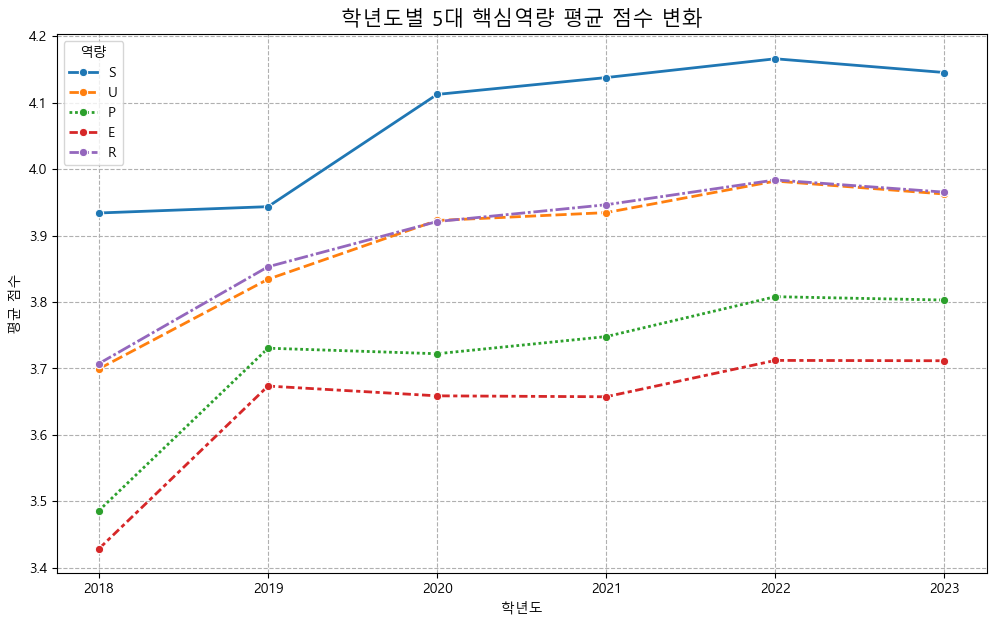

In [3]:
yearly_means = df.groupby('학년도')[['S', 'U', 'P', 'E', 'R']].mean()

plt.figure(figsize=(12, 7))
sns.lineplot(data=yearly_means, marker='o', linewidth=2)
plt.title('학년도별 5대 핵심역량 평균 점수 변화', fontsize=15)
plt.xlabel('학년도')
plt.ylabel('평균 점수')
plt.grid(True, linestyle='--')
plt.legend(title='역량')
plt.show()

### 2-2. 학년별 역량 평균 비교
**분석 목적:** 학년 진급에 따른 학생들의 역량 성장 패턴을 확인합니다.

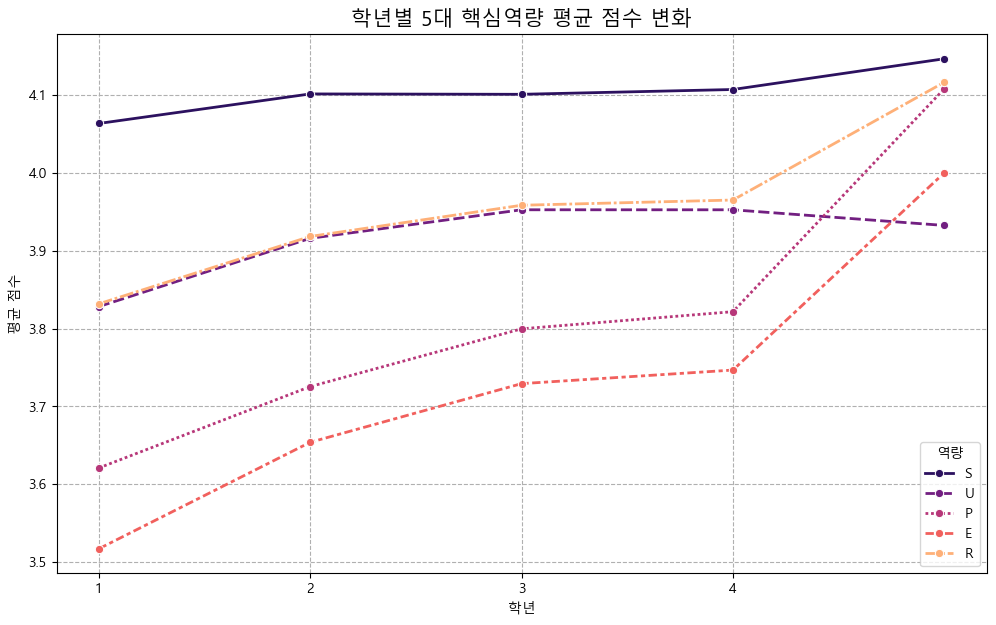

In [4]:
grade_means = df.groupby('학년')[['S', 'U', 'P', 'E', 'R']].mean()

plt.figure(figsize=(12, 7))
sns.lineplot(data=grade_means, marker='o', linewidth=2, palette='magma')
plt.title('학년별 5대 핵심역량 평균 점수 변화', fontsize=15)
plt.xlabel('학년')
plt.ylabel('평균 점수')
plt.xticks([1, 2, 3, 4])
plt.grid(True, linestyle='--')
plt.legend(title='역량')
plt.show()

### 2-3. 단과대학별 역량 평균 비교
**분석 목적:** 전공 계열에 따른 역량 프로필의 차이를 확인합니다.

<Figure size 1500x800 with 0 Axes>

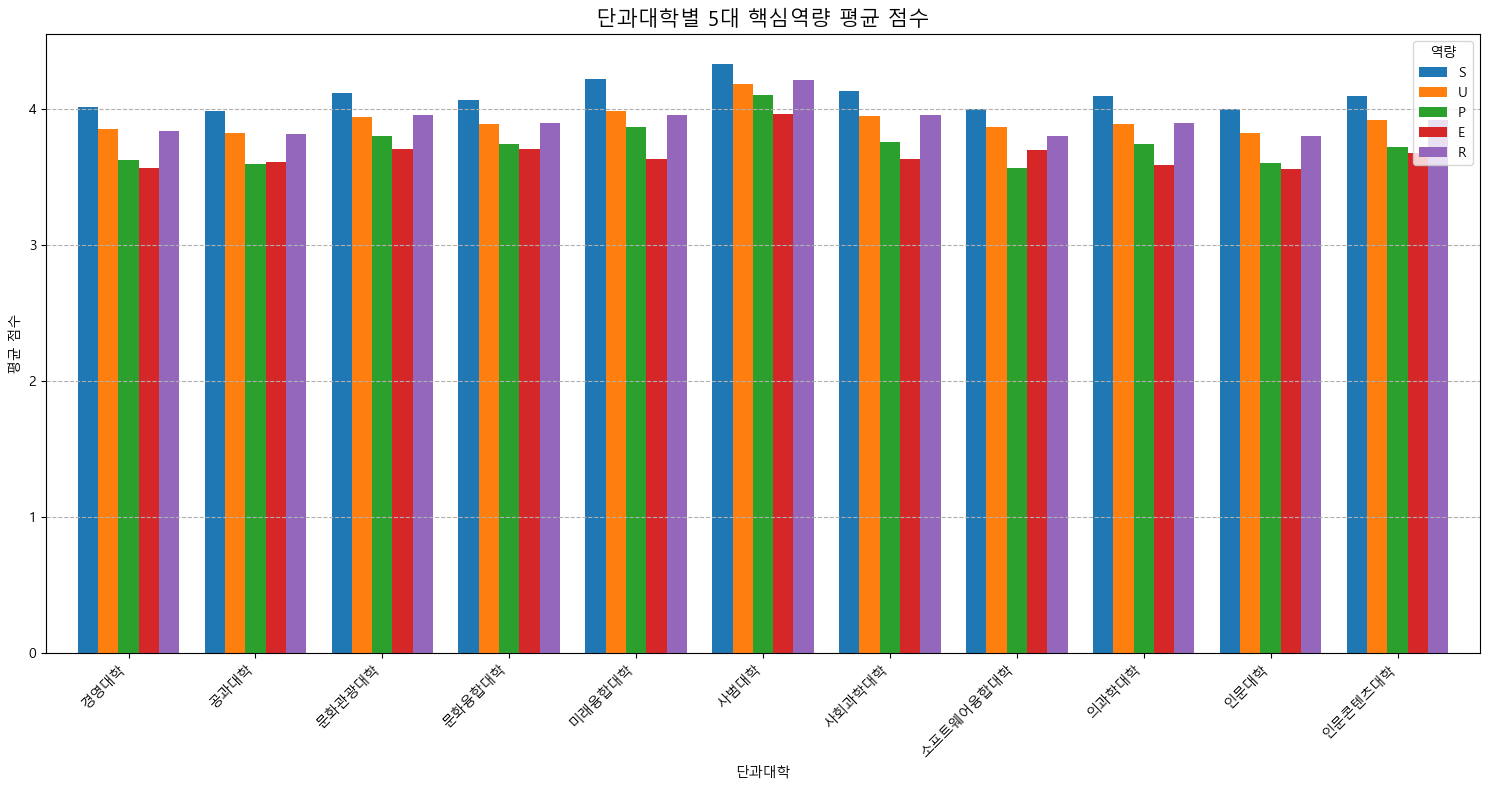

In [5]:
college_means = df.groupby('대학')[['S', 'U', 'P', 'E', 'R']].mean()

plt.figure(figsize=(15, 8))
college_means.plot(kind='bar', width=0.8, figsize=(15, 8))
plt.title('단과대학별 5대 핵심역량 평균 점수', fontsize=15)
plt.xlabel('단과대학')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--')
plt.legend(title='역량')
plt.tight_layout()
plt.show()

## 3. 이중 집단별 분석 (2-Way Analysis)

두 개의 변수를 조합하여 더욱 세분화된 집단 간 역량 차이를 분석합니다. 이를 통해 변수 간의 상호작용 효과를 탐색할 수 있습니다.

### 3-1. 학년도 & 학년별 분석
**분석 목적:** 특정 연도의 학년별 역량 수준을 비교하여, 학년 효과가 매년 일관되게 나타나는지 확인합니다. 예를 들어, 코로나 시기였던 2020년 1학년과 2023년 1학년의 역량 차이를 볼 수 있습니다.

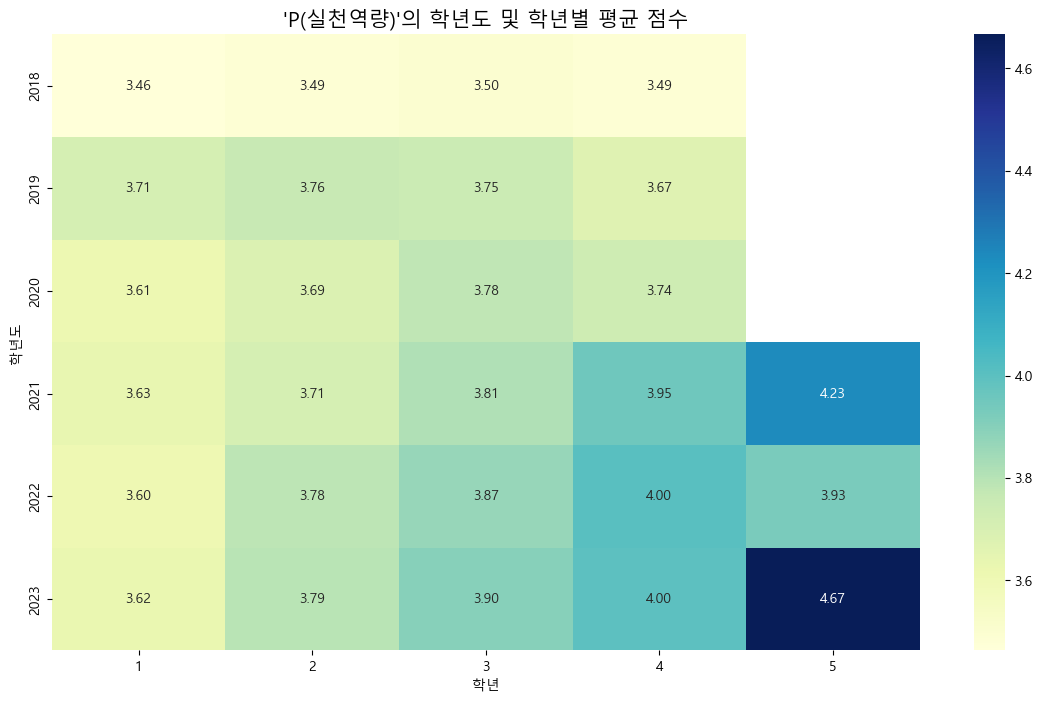

In [6]:
# 학년도와 학년을 기준으로 그룹화하여 평균 계산
year_grade_means = df.groupby(['학년도', '학년'])['P'].mean().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(year_grade_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("'P(실천역량)'의 학년도 및 학년별 평균 점수", fontsize=15)
plt.xlabel('학년')
plt.ylabel('학년도')
plt.show()

### 3-2. 학년도 & 단과대학별 분석
**분석 목적:** 특정 연도에 단과대학별 역량 차이가 어떻게 나타나는지 비교합니다. 시대적 변화에 따라 단과대학별 강점 역량이 어떻게 변했는지 추적할 수 있습니다.

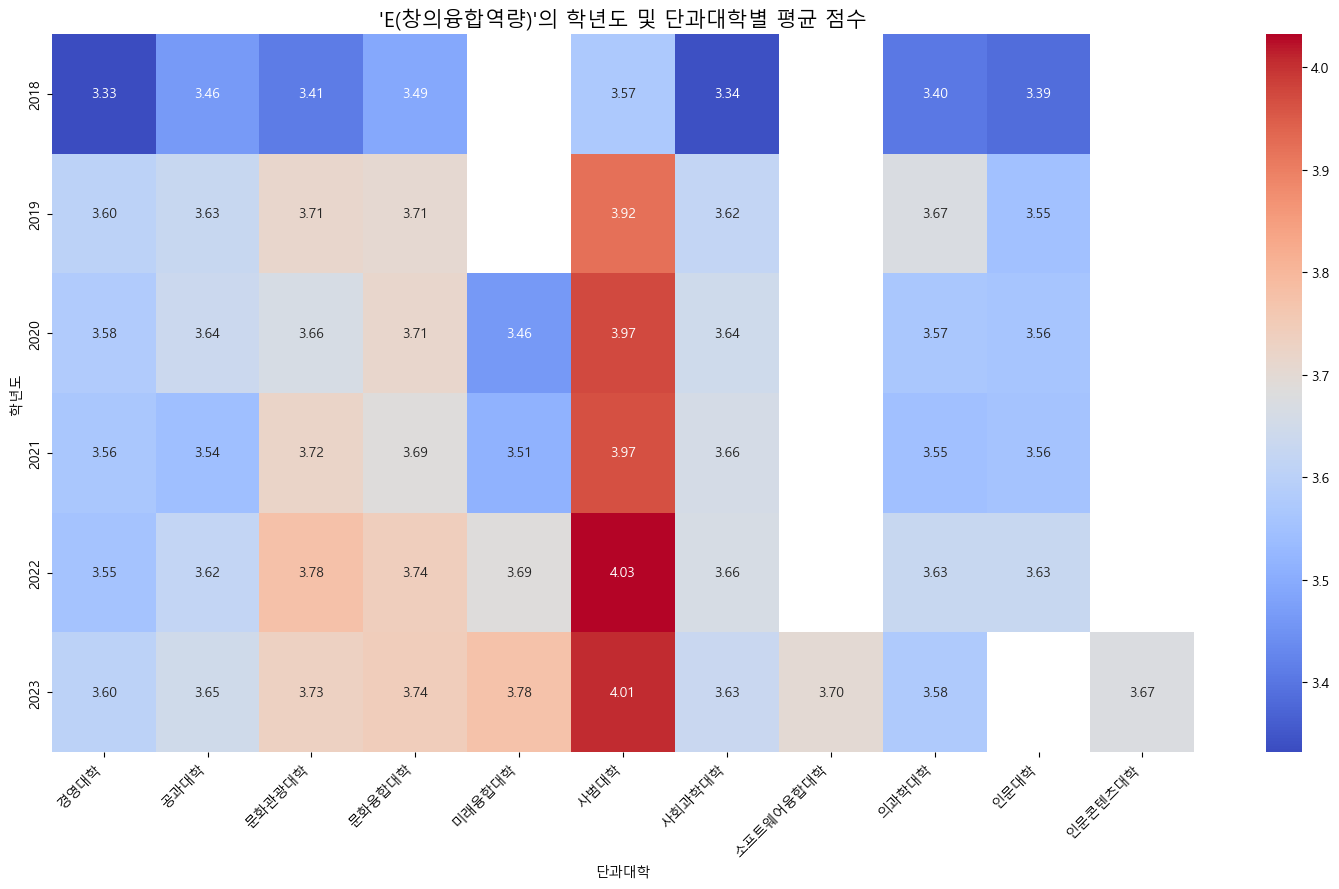

In [7]:
# 학년도와 대학을 기준으로 그룹화하여 평균 계산 (E 역량 예시)
year_college_means = df.groupby(['학년도', '대학'])['E'].mean().unstack()

plt.figure(figsize=(15, 9))
sns.heatmap(year_college_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("'E(창의융합역량)'의 학년도 및 단과대학별 평균 점수", fontsize=15)
plt.xlabel('단과대학')
plt.ylabel('학년도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3-3. 학년 & 단과대학별 분석
**분석 목적:** 단과대학 내에서 학년별 성장 패턴이 어떻게 다른지 비교합니다. 예를 들어, 공과대학의 실천역량 성장세와 인문대학의 성장세를 비교하여 전공별 맞춤형 교육의 효과를 가늠해볼 수 있습니다.

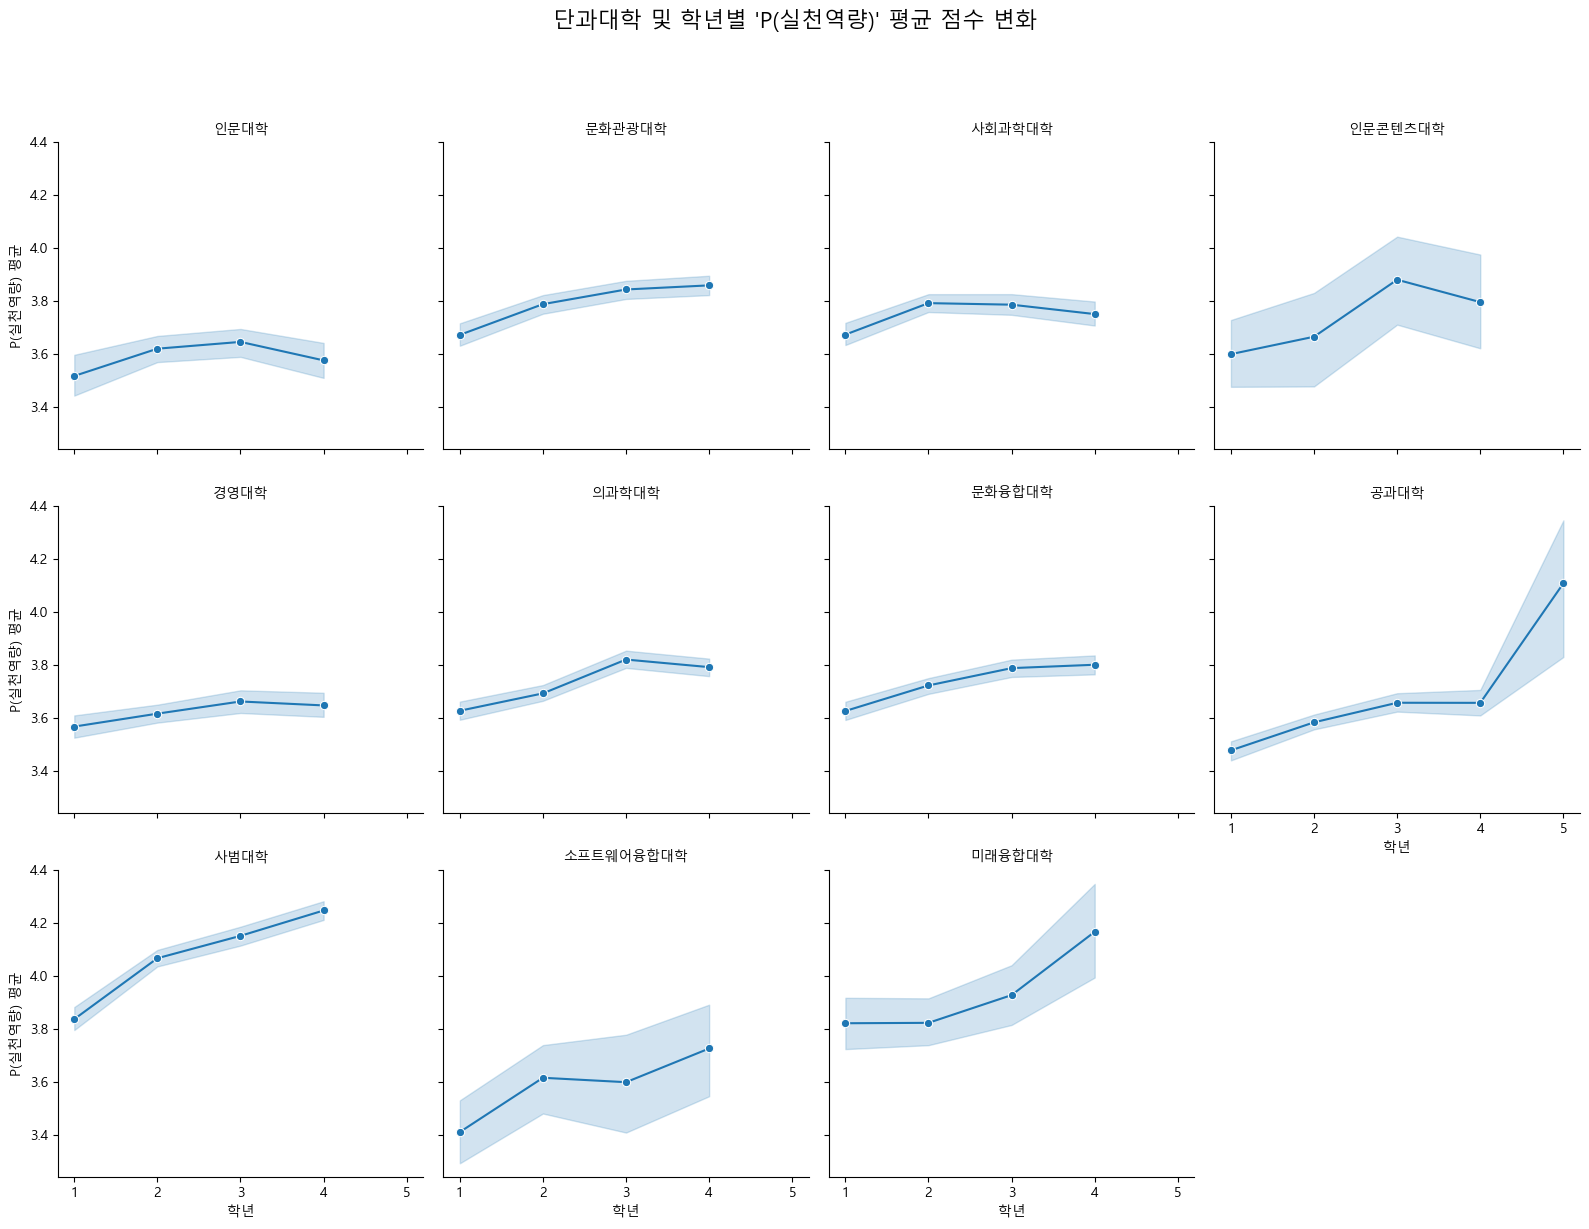

In [8]:
# FacetGrid를 사용하여 여러 그래프를 한 번에 시각화
# 각 단과대학별로 학년에 따른 P(실천역량)의 변화를 선 그래프로 표현
g = sns.FacetGrid(df, col="대학", col_wrap=4, height=4)
g.map(sns.lineplot, "학년", "P", marker='o')
g.fig.suptitle("단과대학 및 학년별 'P(실천역량)' 평균 점수 변화", y=1.02, fontsize=16)
g.set_axis_labels("학년", "P(실천역량) 평균")
g.set_titles("{col_name}")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## 4. 삼중 집단별 분석 (3-Way Analysis)

**분석 목적:** '학년도', '단과대학', '학년' 세 가지 변수를 모두 조합하여 가장 세분화된 집단의 역량 수준을 비교합니다. 이를 통해 특정 시기, 특정 단과대학, 특정 학년의 역량 프로필을 정밀하게 진단할 수 있습니다.

예를 들어, **"2022년 공과대학 4학년 학생들의 실천역량(P) 평균"** 과 같이 매우 구체적인 분석이 가능합니다.

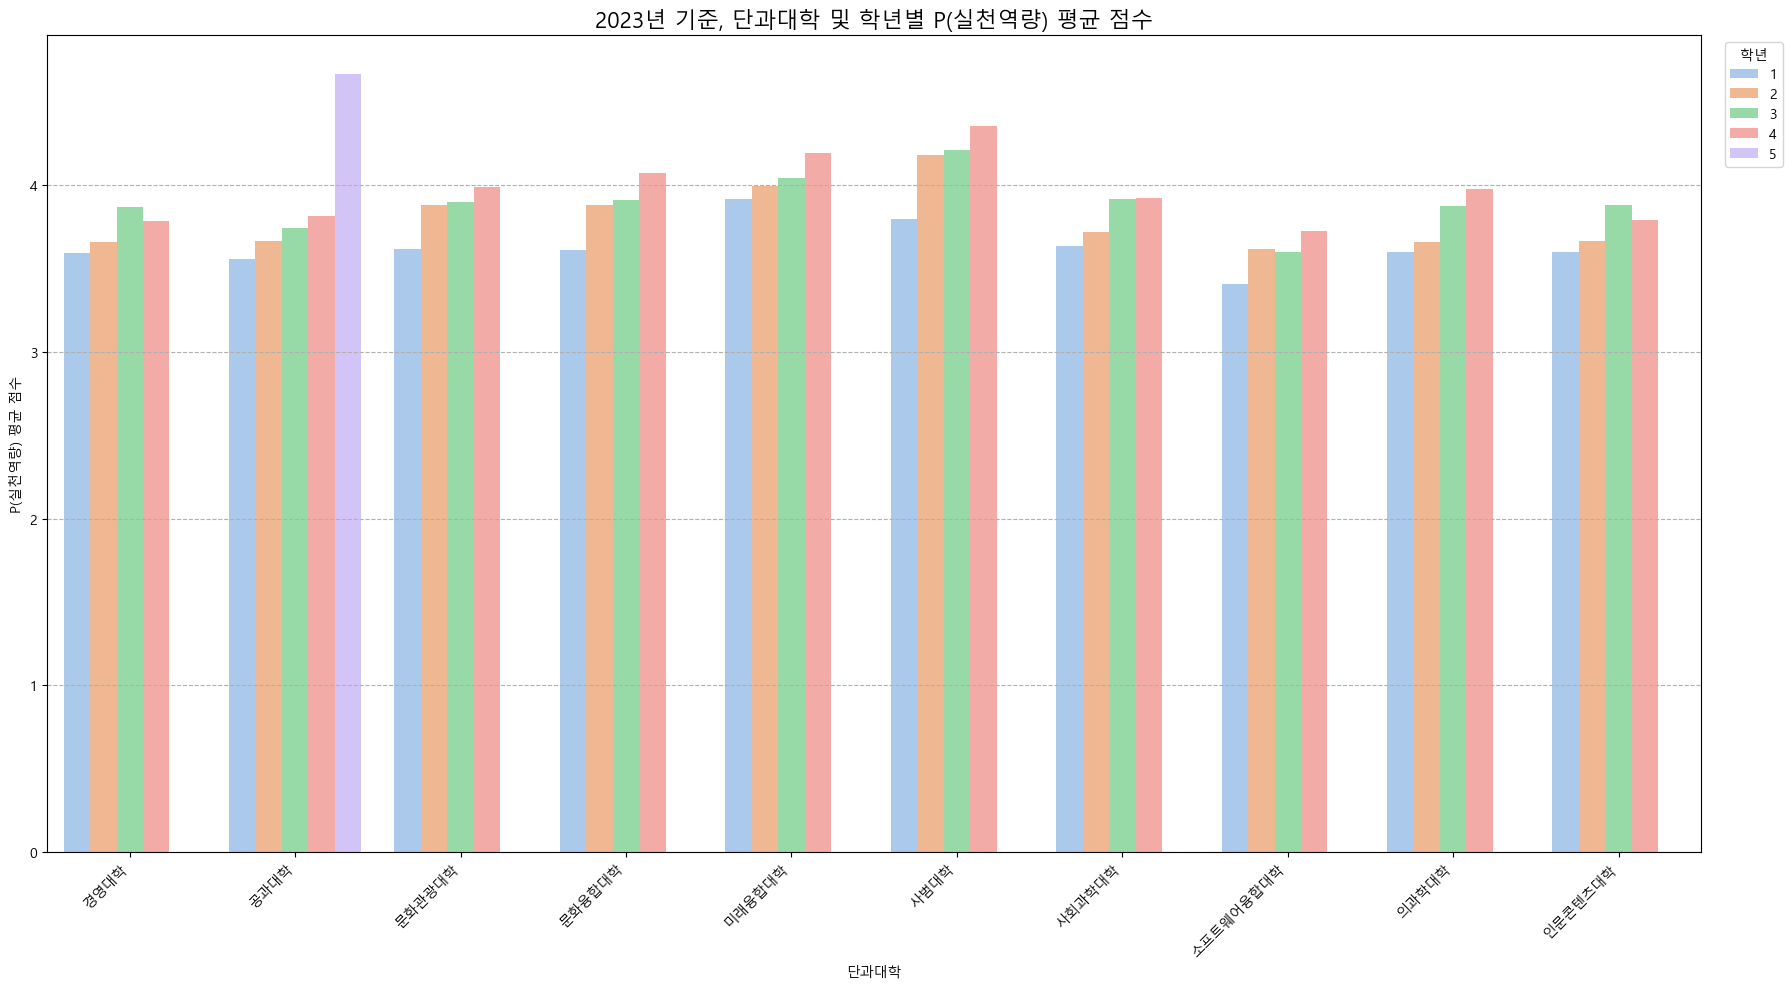

In [9]:
# 3개 변수를 모두 그룹화하여 평균 계산
all_grouped_means = df.groupby(['학년도', '대학', '학년'])[['S', 'U', 'P', 'E', 'R']].mean().reset_index()

# 특정 연도(예: 2023년) 데이터만 필터링하여 시각화
df_2023 = all_grouped_means[all_grouped_means['학년도'] == 2023]

plt.figure(figsize=(18, 10))
sns.barplot(x='대학', y='P', hue='학년', data=df_2023, palette='pastel')
plt.title('2023년 기준, 단과대학 및 학년별 P(실천역량) 평균 점수', fontsize=16)
plt.xlabel('단과대학')
plt.ylabel('P(실천역량) 평균 점수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='학년', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()